In [1]:
%matplotlib notebook
%matplotlib notebook  
%load_ext autoreload
%autoreload 2

## Igor's speedy method...

In [2]:
from __future__ import print_function, absolute_import
from IPython import display
import math
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    make_mto,
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
    initial_conditions_random_all_dims,
)
from nn_system.networks import *

from igor import (
    do_igor_optimization,
    igor_traj_opt_serial,
    igor_traj_opt_parallel,
    igor_supervised_learning,
    igor_supervised_learning_cuda,
    visualize_intermediate_results,
)

## Applying to Pendulum

In [ ]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
def kNetConstructor():
    return MLP(2, 32, layer_norm=False)
#     return MLP(2, 2, layer_norm=False)
#     return FCBIG(2, 2)
net = kNetConstructor()
expmt = "pendulum"
ic_list=None

do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=None)

doing warm start
0 took 0.0264160633087
30 took 0.0470240116119
40 took 0.0418491363525
20 took 0.14220905304
10 took 0.190894126892
60 took 0.0362868309021
50 took 0.135900974274
90 took 0.0556981563568
70 took 0.107927799225
80 took 0.136676073074
120 took 0.0546460151672
110 took 0.0548710823059
result=SolutionResult.kInfeasibleConstraints
100 took 0.0451099872589
140 took 0.103370904922
130 took 0.21549487114
finished warm start
30 took 0.45943903923
0 took 0.663195848465


## Applying to Cartpole

retry result=SolutionResult.kInfeasibleConstraints
0 took 10.8325719833
retry result=SolutionResult.kUnknownError
retry result=SolutionResult.kUnknownError
(100, 4)
(100, 1)
[1,  1000] loss: 1.438
[2,  1000] loss: 1.385
[3,  1000] loss: 1.380
[4,  1000] loss: 1.380
[5,  1000] loss: 1.327
Finished Training
truncating
quit simulation early at 1.8/10.5 due to exceeding time limit
quit simulation early at 2.0/10.5 due to exceeding time limit
quit simulation early at 1.9/10.5 due to exceeding time limit
quit simulation early at 1.6/10.5 due to exceeding time limit
quit simulation early at 2.4/10.5 due to exceeding time limit
quit simulation early at 2.3/10.5 due to exceeding time limit
quit simulation early at 1.9/10.5 due to exceeding time limit


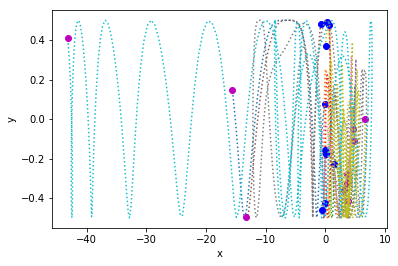

retry result=SolutionResult.kInfeasibleConstraints
0 took 10.8441209793
retry result=SolutionResult.kUnknownError
retry result=SolutionResult.kUnknownError
(100, 4)
(100, 1)
[1,  1000] loss: 0.968
[2,  1000] loss: 0.514
[3,  1000] loss: 0.271
[4,  1000] loss: 0.132
[5,  1000] loss: 0.048
Finished Training
truncating
quit simulation early at 2.0/10.5 due to exceeding time limit
quit simulation early at 2.0/10.5 due to exceeding time limit
quit simulation early at 1.7/10.5 due to exceeding time limit
quit simulation early at 2.2/10.5 due to exceeding time limit
quit simulation early at 1.8/10.5 due to exceeding time limit
quit simulation early at 1.8/10.5 due to exceeding time limit
quit simulation early at 1.6/10.5 due to exceeding time limit


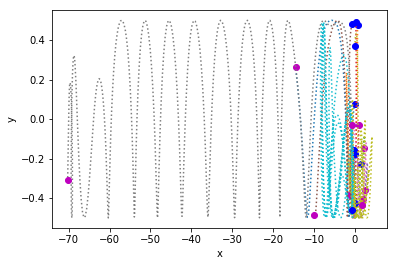

retry result=SolutionResult.kInfeasibleConstraints
0 took 9.03056502342
retry result=SolutionResult.kUnknownError
retry result=SolutionResult.kUnknownError
(100, 4)
(100, 1)
[1,  1000] loss: 0.019
[2,  1000] loss: 0.006
[3,  1000] loss: 0.001
[4,  1000] loss: 0.000
[5,  1000] loss: 0.004
Finished Training
truncating
quit simulation early at 2.2/10.5 due to exceeding time limit
quit simulation early at 2.0/10.5 due to exceeding time limit
quit simulation early at 2.0/10.5 due to exceeding time limit
quit simulation early at 1.9/10.5 due to exceeding time limit
quit simulation early at 1.6/10.5 due to exceeding time limit
quit simulation early at 1.9/10.5 due to exceeding time limit
quit simulation early at 1.6/10.5 due to exceeding time limit


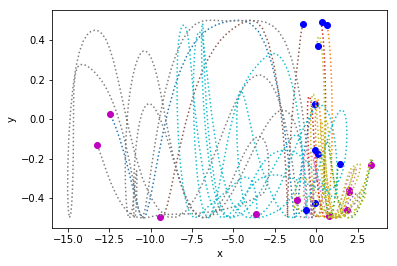

In [3]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
def kNetConstructor():
    return MLP(4, 128, layer_norm=False)
net = kNetConstructor()
expmt = "cartpole"
ic_list=None

do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=True, warm_start=None)

## Applying to to Pendulum

In [ ]:
# First let's just see what Igor Optimization does on pendulum
net = FCBIG(2, 128)
expmt = "pendulum"
num_trajectories = # TODO: have some default for pendulum and cartpole
ic_list = initial_conditions_grid(num_trajectories, ) # TODO: have some default for pendulum and cartpole
do_igor_optimization(net, expmt, ic_list, warm_start=None, num_trajectories=num_trajectories)

In [ ]:
# Then let's experiment with the different minibatch schemes.
# First let's find a good batch size
ic_gen    = # Expmt default
n_iters   = 
inner_fn  = 
network   = 
traj_bank = []
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method1
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method2
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method3
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method4
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method5
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method6
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Now with adding dropout to favorite warm-starting scheme above


## Applying to to Cartpole

## Compare best method to VI solutions?

<IPython.core.display.Javascript object>


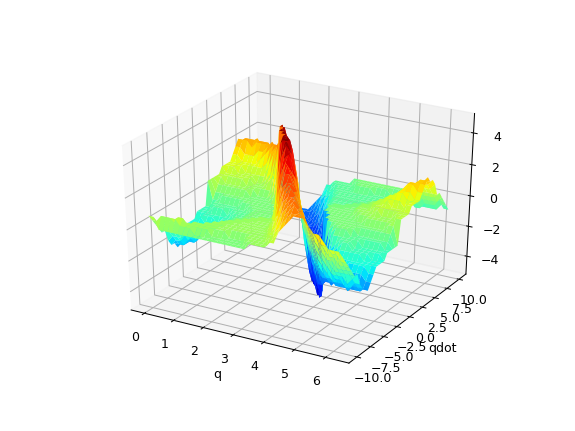

<IPython.core.display.Javascript object>


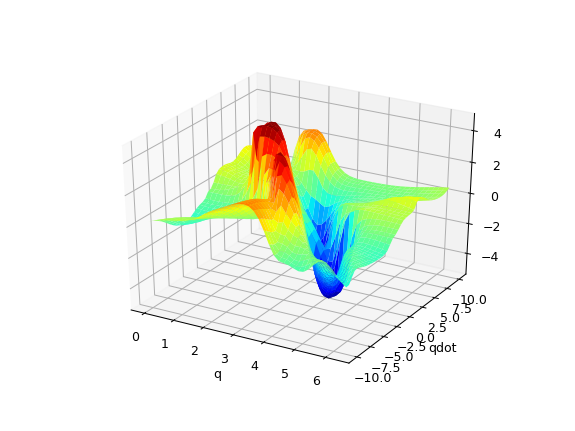

In [211]:
from traj.vi_utils import (
    load_vi_policy,
    vis_vi_policy,
    vis_nn_policy_like_vi_policy
)
vi_policy = load_vi_policy('good', "pendulum")
vis_vi_policy(vi_policy)
vis_nn_policy_like_vi_policy(net, vi_policy)

using_ics=  False
knot_MSE: [13.43466199], traj_MSE: [50.41605436]
[(80000, 2), (80000, 1), (80000, 1)]


<IPython.core.display.Javascript object>


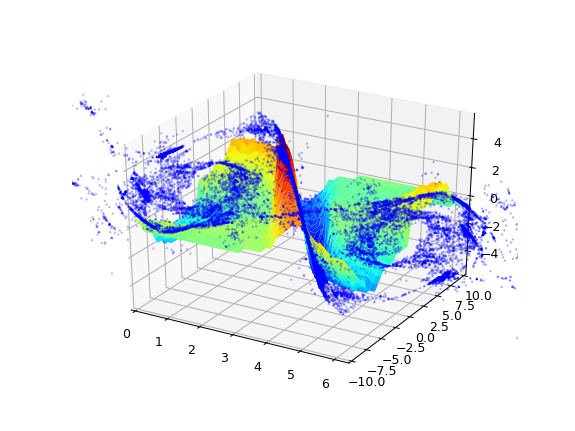

In [201]:
from traj.vi_utils import (graph_vi_policy_vs_traj_knot_scatter)

# ics_or_dircols = ics
ics_or_dircols = dircols
graph_vi_policy_vs_traj_knot_scatter(vi_policy, ics_or_dircols, 
                                     combine_vi_policy_and_scatter=True,
                                     plot_residual=False)